# Import some important libaraies :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Remove warnings:

In [2]:
import warnings
warnings.simplefilter("ignore")

# Display all columns and rows in the output :

In [3]:
pd.set_option("display.max_columns",None)
pd.set_option('display.max_rows',None)

# Load our data :

In [4]:
df1=pd.read_csv('/kaggle/input/ieee-victories2/Train_Batch_1.csv')
df2=pd.read_csv('/kaggle/input/ieee-victories2/Train_Batch_2.csv')
df3=pd.read_csv('/kaggle/input/ieee-victories2/Train_Batch_3.csv')
test=pd.read_csv('/kaggle/input/ieee-victories2/test.csv')
submission=pd.read_csv('/kaggle/input/ieee-victories2/sample_submission.csv')

# Let's have imformation about the dataset:

In [5]:
df1.head()

,Unnamed: 0,Person Description,Place Code,Customer Order,Additional Features in market,Promotion Name,Store Kind,Store Sales,Store Cost,Product Weights Data in (KG),Is Recyclable?,Min. Yearly Income,Store Area,Grocery Area,Frozen Area,Meat Area,Cost
0,mc_ID_0,"Single Female with four children, education: b...",H11go_ZA,"Cleaning Supplies from Household department, O...","['Video Store', 'Florist', 'Ready Food', 'Coff...",Dimes Off,Deluxe,8.76 Millions,4.2924 Millions,"{'Gross Weight': 28.1997, 'Net Weight': 26.600...",recyclable,10K+,2842.23,2037.64,481.98,323,602.7575
1,mc_ID_1,"Single Female with three children, education: ...",S04ne_WA,"Snack Foods from Snack Foods department, Order...",NaN,Budget Bargains,Supermarket,6.36 Millions,1.9716 Millions,"{'Gross Weight': 16.571, 'Net Weight': 14.972,...",non recyclable,50K+,2814.95,2049.72,457.36,NaN,708.6650
2,mc_ID_2,"Married Male with two children, education: hig...",L05es_CA,"Magazines from Periodicals department, Ordered...",['Florist'],Shelf Emptiers,Supermarket,10.86 Millions,4.4526 Millions,"{'Gross Weight': 28.6358, 'Net Weight': 27.182...",recyclable,30K+,2192.32,1322.21,523.32,348.85,564.2647
3,mc_ID_3,"Single Female with three children, education: ...",S03le_WA,"Dairy from Dairy department, Ordered Brand : C...",['Coffee Bar'],Savings Galore,NaN,1.98 Millions,0.6732 Millions,"{'Gross Weight': 14.2161, 'Net Weight': 11.294...",recyclable,30K+,1974.73,NaN,440.92,293.95,724.5119
4,mc_ID_4,"Married Female with five children, education: ...",M10da_YU,"Vegetables from Produce department, Ordered Br...","['Bar For Salad', 'Ready Food', 'Coffee Bar', ...",Sale Winners,Deluxe,11.56 Millions,4.9708 Millions,"{'Gross Weight': 12.6172, 'Net Weight': 9.71, ...",non recyclable,50K+,2862.3,1872.19,593.93,395.95,519.7574


In [6]:
df2.head()

,Unnamed: 0,Person Description,Place Code,Customer Order,Additional Features in market,Promotion Name,Store Kind,Store Sales,Store Cost,Gross Weight,Net Weight,Is Recyclable?,Min. Person Yearly Income,Store Area,Grocery Area,Frozen Area,Meat Area,Cost
0,mc_ID_0,"Single Male with two children, education: high...",S01em_OR,"Baking Goods from Baking Goods department, Ord...","['Video Store', 'Florist', 'Ready Food', 'Bar ...",Tip Top Savings,Deluxe,3.28 M,0.984 M,21.9493,19.0421,yes,30K+,2577.50,1734.50,503.07,335.38,287.1270
1,mc_ID_1,"Married Male with four children, education: hi...",T02ma_WA,"Canned Sardines from Canned Foods department, ...","['Florist', 'Bar For Salad', 'Ready Food', 'Co...",Discount Frenzy,Deluxe,9.35 M,4.2075 M,19.1874,16.1349,yes,30K+,3145.51,2057.74,654.13,NaN,779.6884
2,mc_ID_2,"Married Female with three children, education:...",S04ne_WA,"Frozen Desserts from Frozen Foods department, ...",[],Tip Top Savings,Supermarket,8.4 M,3.192 M,16.7163,12.3555,no,30K+,2811.99,2049.72,457.36,304.91,557.8318
3,mc_ID_3,"Single Male with four children, education: par...",V13er_BC,"Frozen Desserts from Frozen Foods department, ...","['Coffee Bar', 'Ready Food', 'Bar For Salad', ...",Price Cutters,NaN,4.6 M,1.518 M,24.1296,NaN,yes,10K+,2147.17,NaN,373.1,248.79,642.0871
4,mc_ID_4,"Married Female with four children, education: ...",B14on_WA,"Meat from Deli department, Ordered Brand : Moms","['Ready Food', 'Bar For Salad']",Money Savers,Supermarket,6.81 M,3.2007 M,17.8792,16.4256,no,50K+,3685.30,2265.90,853.22,568.75,432.0503


In [7]:
df3.head()

,Unnamed: 0,Person%20Description,Place%20Code,Customer%20Order,Additional%20Features%20in%20market,Promotion%20Name,Store%20Kind,Store%20Sales,Store%20Cost,Gross%20Weight,Net%20Weight,Weights%20Data,Is%20Recyclable?,Yearly%20Income,Store%20Area,Grocery%20Area,Frozen%20Area,Meat%20Area,Cost
0,mc_ID_0,"Single Female with two children, education: pa...",T02ma_WA,"Meat from Deli department, Ordered Brand : Red...","['Coffee Bar', 'Florist', 'Ready Food', 'Bar F...",Sale : Double Down,Deluxe,7.12 Millions,2.5632 Millions,23.2575,20.3503,"{'Gross Weight': 23.2575, 'Net Weight': 20.350...",yes,90K+,3145.51,2056.79,654.13,436.09,500.7202
1,mc_ID_1,"Single Female with five children, education: p...",M10da_YU,"Specialty from Produce department, Ordered Bra...","['Coffee Bar', 'Florist', 'Bar For Salad', 'Vi...",GLD,Deluxe,14.72 Millions,7.0656 Millions,16.7163,12.3555,"{'Gross Weight': 16.7163, 'Net Weight': 12.355...",yes,30K+,2856.68,1871.16,595.93,395.51,484.1411
2,mc_ID_2,"Married Male with three children, education: h...",T02ma_WA,"Paper Products from Household department, Orde...","['Coffee Bar', 'Bar For Salad', 'Ready Food', ...",Promo Big,Deluxe,4.98 Millions,2.4402 Millions,10.5531,7.6459,"{'Gross Weight': 10.5531, 'Net Weight': 7.6459...",no,30K+,3140.99,2055.29,654.13,436.09,267.3576
3,mc_ID_3,"Married Female with five children, education: ...",H11go_ZA,"Snack Foods from Snack Foods department, Order...","['Video Store', 'Coffee Bar', 'Ready Food', 'F...",Price Destroyers,NaN,5.24 Millions,2.0436 Millions,23.6936,NaN,"{'Gross Weight': 23.6936, 'Net Weight': 20.641...",no,10K+,2841.35,2038.11,481.98,322.22,777.2826
4,mc_ID_4,"Married Female with No children, education: pa...",O09ba_VE,"Canned Soup from Canned Foods department, Orde...","['Ready Food', 'Bar For Salad']",Save Price,Supermarket,8.84 Millions,3.4476 Millions,13.6056,10.6839,"{'Gross Weight': 13.6056, 'Net Weight': 10.683...",no,110K+,3236.33,2448.37,472.27,313.87,406.4756


In [8]:
test.head()

,Unnamed: 0,Person Description,Place Code,Customer Order,Additional Features in market,Promotion Name,Store Kind,Store Sales,Store Cost,Gross Weight,Net Weight,Package Weight,Is Recyclable?,Yearly Income,Store Area,Grocery Area,Frozen Area,Meat Area
0,0,"Single Male with four children, education: par...",B06ls_CA,"Candy from Snacks department, Ordered Brand : ...","['Florist', 'Ready Food', 'Video Store', 'Bar ...",Fantastic Discounts,Gourmet,11.76 Millions,4.704 Millions,31.8337,28.7811,3.0525,yes,50K+,2201.06,1424.85,465.54,308.73
1,1,"Married Female with three children, education:...",S01em_OR,"Vegetables from Frozen Foods department, Order...","['Florist', 'Coffee Bar', 'Ready Food', 'Bar F...",Bag Stuffer,Deluxe,2.16 Millions,0.6696 Millions,29.9440,27.0368,2.9072,no,70K+,2577.16,1735.17,505.07,336.59
2,2,"Single Female with three children, education: ...",H11go_ZA,"Dairy from Dairy department, Ordered Brand : Club","['Bar For Salad', 'Video Store', 'Ready Food',...",Pick Your Savings,Deluxe,1.83 Millions,0.8235 Millions,29.2172,26.3100,2.9072,no,130K+,2837.58,2038.11,481.98,321.26
3,3,"Single Male with three children, education: pa...",M10da_YU,"Frozen Desserts from Frozen Foods department, ...","['Coffee Bar', 'Video Store', 'Bar For Salad',...",Price Winners,Deluxe,8.82 Millions,4.41 Millions,28.0543,25.0018,3.0525,no,10K+,2859.04,1871.16,593.93,394.58
4,4,"Single Male with two children, education: high...",L05es_CA,"Hot Beverages from Beverages department, Order...",['Florist'],Dollar Days,Supermarket,4.32 Millions,1.9872 Millions,23.5482,20.6410,2.9072,no,30K+,2193.97,1320.15,523.32,348.85


In [9]:
# Print the shape of each dataframe
print("Shape of df1:", df1.shape)
print("Shape of df2:", df2.shape)
print("Shape of df3:", df3.shape)

Shape of df1: (19440, 17)
Shape of df2: (12956, 18)
Shape of df3: (6466, 19)


In [10]:
# Print the shape of each dataframe
print("columns of df1:", df1.columns)
print("columns of df2:", df2.columns)
print("columns of df3:", df3.columns)

columns of df1: Index(['Unnamed: 0', 'Person Description', 'Place Code', 'Customer Order',
       'Additional Features in market', 'Promotion Name', 'Store Kind',
       'Store Sales', 'Store Cost', 'Product Weights Data in (KG)',
       'Is Recyclable?', 'Min. Yearly Income', 'Store Area', 'Grocery Area',
       'Frozen Area', 'Meat Area', 'Cost'],
      dtype='object')
columns of df2: Index(['Unnamed: 0', 'Person Description', 'Place Code', 'Customer Order',
       'Additional Features in market', 'Promotion Name', 'Store Kind',
       'Store Sales', 'Store Cost', 'Gross Weight', 'Net Weight',
       'Is Recyclable?', 'Min. Person Yearly Income', 'Store Area',
       'Grocery Area', 'Frozen Area', 'Meat Area', 'Cost'],
      dtype='object')
columns of df3: Index(['Unnamed: 0', 'Person%20Description', 'Place%20Code',
       'Customer%20Order', 'Additional%20Features%20in%20market',
       'Promotion%20Name', 'Store%20Kind', 'Store%20Sales', 'Store%20Cost',
       'Gross%20Weight', 'Ne

# prepare train batches

In [11]:
                                  # train_batch_1                    

# Extract 'Gross Weight', 'Net Weight', and 'Package Weight' from 'Product Weights Data in (KG)'
df1[['Gross Weight', 'Net Weight', 'Package Weight']] = df1['Product Weights Data in (KG)'].str.extract(r"'Gross Weight': (\d+\.\d+), 'Net Weight': (\d+\.\d+), 'Package Weight': (\d+\.\d+)")

# Drop the original column 'Product Weights Data in (KG)'
df1.drop(columns=['Product Weights Data in (KG)'], inplace=True)
# Renaming columns in df1 to match the naming convention in df2 and df3
df1.rename(columns={'Product Weights Data in (KG)': 'Weights Data',
                    'Min. Yearly Income': 'Yearly Income'}, inplace=True)

                                # train_batch_2      
    
# Calculate 'Package Weight' based on 'Gross Weight' and 'Net Weight'
df2['Package Weight'] = df2['Gross Weight'] - df2['Net Weight']
# Renaming columns in df2 to match the naming convention in df1 and df3
df2.rename(columns={'Min. Person Yearly Income': 'Yearly Income'}, inplace=True)
 
                                # train_batch_3      

# Remove "%" and "20" from column names and replace with space for df3
df3.columns = [col.replace("%20", " ") for col in df3.columns]

# Extract 'Package Weight' using regular expressions
df3['Package Weight'] = df3['Weights Data'].str.extract(r"'Package Weight': (\d+\.\d+)")

# Drop the original column 'Weights Data'
df3.drop(columns=['Weights Data'], inplace=True)

In [12]:
# Concatenate the dataframes vertically
train_data = pd.concat([df1, df2, df3], ignore_index=True)

In [13]:
train_data.head()

,Unnamed: 0,Person Description,Place Code,Customer Order,Additional Features in market,Promotion Name,Store Kind,Store Sales,Store Cost,Is Recyclable?,Yearly Income,Store Area,Grocery Area,Frozen Area,Meat Area,Cost,Gross Weight,Net Weight,Package Weight
0,mc_ID_0,"Single Female with four children, education: b...",H11go_ZA,"Cleaning Supplies from Household department, O...","['Video Store', 'Florist', 'Ready Food', 'Coff...",Dimes Off,Deluxe,8.76 Millions,4.2924 Millions,recyclable,10K+,2842.23,2037.64,481.98,323,602.7575,28.1997,26.6008,1.599
1,mc_ID_1,"Single Female with three children, education: ...",S04ne_WA,"Snack Foods from Snack Foods department, Order...",NaN,Budget Bargains,Supermarket,6.36 Millions,1.9716 Millions,non recyclable,50K+,2814.95,2049.72,457.36,NaN,708.6650,16.571,14.972,1.599
2,mc_ID_2,"Married Male with two children, education: hig...",L05es_CA,"Magazines from Periodicals department, Ordered...",['Florist'],Shelf Emptiers,Supermarket,10.86 Millions,4.4526 Millions,recyclable,30K+,2192.32,1322.21,523.32,348.85,564.2647,28.6358,27.1822,1.4536
3,mc_ID_3,"Single Female with three children, education: ...",S03le_WA,"Dairy from Dairy department, Ordered Brand : C...",['Coffee Bar'],Savings Galore,NaN,1.98 Millions,0.6732 Millions,recyclable,30K+,1974.73,NaN,440.92,293.95,724.5119,14.2161,11.2944,2.9217
4,mc_ID_4,"Married Female with five children, education: ...",M10da_YU,"Vegetables from Produce department, Ordered Br...","['Bar For Salad', 'Ready Food', 'Coffee Bar', ...",Sale Winners,Deluxe,11.56 Millions,4.9708 Millions,non recyclable,50K+,2862.3,1872.19,593.93,395.95,519.7574,12.6172,9.71,2.9072


In [14]:
train_data.shape

(38862, 19)

In [15]:
#show datatype and count non null values
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38862 entries, 0 to 38861
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     38862 non-null  object 
 1   Person Description             38862 non-null  object 
 2   Place Code                     38862 non-null  object 
 3   Customer Order                 38860 non-null  object 
 4   Additional Features in market  34562 non-null  object 
 5   Promotion Name                 33034 non-null  object 
 6   Store Kind                     33053 non-null  object 
 7   Store Sales                    38847 non-null  object 
 8   Store Cost                     38855 non-null  object 
 9   Is Recyclable?                 38860 non-null  object 
 10  Yearly Income                  38854 non-null  object 
 11  Store Area                     35297 non-null  object 
 12  Grocery Area                   35256 non-null 

In [16]:
nans = train_data.isna().sum().sort_values(ascending=False)
pct = 100 * nans / train_data.shape[0]
pd.concat([nans, pct], axis=1)


,0,1
Promotion Name,5828,14.996655
Store Kind,5809,14.947764
Additional Features in market,4300,11.064793
Grocery Area,3606,9.278987
Package Weight,3578,9.206937
Store Area,3565,9.173486
Frozen Area,3552,9.140034
Meat Area,3549,9.132314
Gross Weight,2917,7.506047
Net Weight,2893,7.444290


In [17]:
# Drop rows with missing values in the "Cost" column
train_data.dropna(subset=['Cost'], inplace=True)


In [18]:
# List of columns to convert to float
columns_to_convert = ['Gross Weight', 'Net Weight', 'Package Weight', 'Store Area', 'Grocery Area', 'Frozen Area', 'Meat Area']

# Convert specified columns to float 
train_data[columns_to_convert] = train_data[columns_to_convert].apply(lambda x: pd.to_numeric(x, errors='coerce'))


In [19]:
#show if there is full duplicates 
train_data.duplicated().sum()

8

* there are duplicates i will drop them 

In [20]:
# Drop duplicates in train_data
train_data.drop_duplicates(inplace=True)


In [21]:
# summary statistics od data 
train_data.describe()

,Store Area,Grocery Area,Frozen Area,Meat Area,Cost,Gross Weight,Net Weight,Package Weight
count,35259.000000,35218.000000,35275.000000,35277.000000,38823.000000,35906.000000,35932.000000,35246.000000
mean,2597.965479,1775.533243,493.524270,328.931229,519.238529,20.063321,17.136677,2.926092
std,528.766679,371.342373,145.970425,97.108128,156.878604,6.716012,6.810534,1.010845
min,1882.700000,1233.080000,227.800000,149.900000,265.631700,8.721600,4.433500,1.453500
25%,2189.425000,1507.532500,440.920000,293.280000,364.269500,14.056200,11.207200,2.907100
50%,2572.860000,1734.500000,470.270000,313.550000,515.259600,19.768900,16.861700,2.907200
75%,2863.835000,2052.620000,534.290000,356.190000,662.222600,25.728600,23.257500,3.052500
max,7857.550000,8103.200000,1783.640000,570.740000,783.192500,31.833700,30.234700,4.506200


In [22]:
# info about categorical variables
train_data.describe(include="object")

,Unnamed: 0,Person Description,Place Code,Customer Order,Additional Features in market,Promotion Name,Store Kind,Store Sales,Store Cost,Is Recyclable?,Yearly Income
count,38823,38823,38823,38821,34531,32999,33016,38808,38816,38821,38816
unique,19426,395,19,271,151,49,5,1869,13823,4,9
top,mc_ID_0,"Single Male with one child, education: bachelo...",T02ma_WA,"Snack Foods from Snack Foods department, Order...",['Coffee Bar'],Save Price,Supermarket,4.8 Millions,1.512 Millions,recyclable,30K+
freq,3,533,3655,952,4491,1288,14301,128,34,10829,12460


In [23]:
train_data.drop(columns=['Unnamed: 0','Additional Features in market'], inplace=True)

# 'Person Description' column :

In [24]:
# Extract marital status
train_data['Marital Status'] = train_data['Person Description'].str.extract(r'(Single|Married)')

# Extract gender
train_data['Gender'] = train_data['Person Description'].str.extract(r'(Female|Male)')

# Adjust the extraction pattern to capture the number of children
train_data['Number of Children'] = train_data['Person Description'].str.extract(r'with (.*?) ["children,", "child,"]')

# Extract education level
train_data['Education Level'] = train_data['Person Description'].str.extract(r'education: (.*?)(?: degree| working)')

# Extract occupation
train_data['Occupation'] = train_data['Person Description'].str.extract(r'working as ([a-zA-Z\s]+)')


In [25]:
# Extract marital status
test['Marital Status'] =test['Person Description'].str.extract(r'(Single|Married)')

# Extract gender
test['Gender'] =test['Person Description'].str.extract(r'(Female|Male)')

# Adjust the extraction pattern to capture the number of children
test['Number of Children'] = test['Person Description'].str.extract(r'with (.*?) ["children,", "child,"]')

# Extract education level
test['Education Level'] = test['Person Description'].str.extract(r'education: (.*?)(?: degree| working)')

# Extract occupation
test['Occupation'] = test['Person Description'].str.extract(r'working as ([a-zA-Z\s]+)')


In [26]:
train_data.drop(columns=['Person Description'], inplace=True)


# 'Yearly Income' column :

In [27]:
train_data['Yearly Income'].unique()

array(['10K+', '50K+', '30K+', '130K+', '70K+', '110K+', '90K+', '150K+',
       nan, '130K+.'], dtype=object)

In [28]:
# Extract the numbers and convert to float
train_data['Yearly Income'] = train_data['Yearly Income'].str.extract('(\d+)').astype(float)


In [29]:
# Extract the numbers and convert to float
test['Yearly Income'] = test['Yearly Income'].str.extract('(\d+)').astype(float)


# 'Place Code' column :

In [30]:
# Extract features from 'Place Code'
train_data['Area'] = train_data['Place Code'].str.split('_').str[0]
train_data['Code'] = train_data['Place Code'].str.split('_').str[1]


# 'Promotion Name' column :

In [31]:
# Drop rows with missing values in the "Promotion Name" column
train_data.dropna(subset=['Promotion Name'], inplace=True)


In [32]:
train_data['Promotion Name'].unique()

array(['Dimes Off', 'Budget Bargains', 'Shelf Emptiers', 'Savings Galore',
       'Sale Winners', 'Weekend Discount', 'Price Winners',
       'Shelf Clearing Days', 'Big Time Discounts',
       'Lottery Cash Registerion', 'Pick Your Savings', 'Super Savers',
       'Two Day Sale', 'Sale Sale Sale', 'Wallet Savers', 'Money Savers',
       'Save Price', 'Best Savings', 'Big Time Saving', 'Bag Stuffer',
       'Save It (Sale)', 'Dollar Days', 'Discount Frenzy', 'Sales Days',
       'Sale : Double Down', 'Coupon Spectacular', 'Three for One',
       'Super Duper Savers', 'GLD', 'Go For It', 'Mystery Sale',
       'One Day Sale', 'I Cant Believe It Sale', 'You Save Days',
       'Double Your Savings', 'Full Free', 'Saving Days',
       'Roller Savings (High) ', 'Green Light Special', 'Price Slashers',
       'Price Cutters', 'Two for One', 'Promo Big', 'Price Destroyers',
       'Tip Top Savings', 'Best Price Savers', 'Super Wallet Savers',
       'Price Smashers', 'Fantastic Discounts'], d

In [33]:
# Update the categories dictionary
categories = {
    'Discount': ['Dimes Off', 'Budget Bargains', 'Weekend Discount', 'Price Winners', 'Big Time Discounts',
                 'Save Price', 'Dollar Days', 'Discount Frenzy', 'Coupon Spectacular', 'Three for One',
                 'Price Slashers', 'Price Cutters', 'Two for One', 'Price Destroyers', 'Price Smashers',
                 'Fantastic Discounts', 'Promo Big'],
    'Special': ['Shelf Emptiers', 'Shelf Clearing Days', 'Lottery Cash Registerion', 'Green Light Special'],
    'Savings': ['Savings Galore', 'Pick Your Savings', 'Super Savers', 'Wallet Savers', 'Money Savers',
                'Best Savings', 'Big Time Saving', 'Super Duper Savers', 'Tip Top Savings', 'Best Price Savers',
                'Super Wallet Savers', 'Save It (Sale)', 'Double Your Savings', 'Saving Days', 'Roller Savings (High) ', 'You Save Days'],
    'Sale': ['Sale Winners', 'Two Day Sale', 'Sale Sale Sale', 'Sales Days', 'Sale : Double Down',
             'Mystery Sale', 'One Day Sale', 'I Cant Believe It Sale', 'You Save Days'],
    'Other': ['Bag Stuffer', 'GLD', 'Go For It', 'Full Free']
}

# Update Promotion Category based on Promotion Name
train_data['Promotion Category'] = train_data['Promotion Name'].apply(lambda x: next((cat for cat, names in categories.items() if x in names), None))


In [34]:
train_data['Promotion Category'].value_counts()

Promotion Category
Discount    11620
Savings     10061
Sale         5638
Other        3244
Special      2436
Name: count, dtype: int64

# 'Customer Order' column :

In [35]:
# Split the 'Customer Order' column into 'Product Type', 'Department', and 'Ordered Brand'
train_data[['Product Type', 'Department', 'Ordered Brand']] = train_data['Customer Order'].str.extract(r'([\w\s]+) from ([\w\s]+) department, Ordered Brand : ([\w\s]+)')


In [36]:
# For example, handling missing values:
train_data.fillna(value={'Product Type': 'Unknown', 'Department': 'Unknown', 'Ordered Brand': 'Unknown'}, inplace=True)

In [37]:

# Drop the original 'Customer Order' column if not needed
train_data.drop(columns=['Customer Order'], inplace=True)


# 'Store Sales' and 'Store Cost' columns :

In [38]:
# Remove " Millions" or "M" and convert to numeric for 'Store Sales'
train_data['Store Sales'] = train_data['Store Sales'].str.replace(' Millions', '').str.replace('M', '').astype(float)

# Remove " Millions" or "M" and convert to numeric for 'Store Cost'
train_data['Store Cost'] = train_data['Store Cost'].str.replace(' Millions', '').str.replace('M', '').astype(float)


In [39]:
# Define mappings
mappings = {
    'Occupation': {'professional': 0, 'management': 1, 'skilled manual': 2, 'manual': 3, 'clerical': 4},
    'Is Recyclable?': {'recyclable': 1, 'non recyclable': 0, 'yes': 1, 'no': 0},
    'Marital Status': {'Single': 0, 'Married': 1},
    'Number of Children': {'four': 4, 'three': 3, 'two': 2, 'five': 5, 'one': 1, 'No': 0},
    'Education Level': {'bachelors': 0, 'high school': 1, 'partial college': 2, 'partial high school': 3, 'graduate': 4},
    'Gender': {'Female': 0, 'Male': 1},
    'Promotion Category': {'Discount': 0, 'Savings': 1, 'Sale': 2, 'Other': 3, 'Special': 4}
}

# Apply mappings
train_data.replace(mappings, inplace=True)
# Apply mappings
test.replace(mappings, inplace=True)


In [40]:
# Columns to be converted to categorical
columns_to_convert = ['Occupation', 'Is Recyclable?', 'Marital Status', 'Education Level', 'Gender']

# Convert specified columns to categorical
train_data[columns_to_convert] = train_data[columns_to_convert].apply(lambda x: x.astype('category'))


In [41]:
train_data.head()

,Place Code,Promotion Name,Store Kind,Store Sales,Store Cost,Is Recyclable?,Yearly Income,Store Area,Grocery Area,Frozen Area,Meat Area,Cost,Gross Weight,Net Weight,Package Weight,Marital Status,Gender,Number of Children,Education Level,Occupation,Area,Code,Promotion Category,Product Type,Department,Ordered Brand
0,H11go_ZA,Dimes Off,Deluxe,8.76,4.2924,1.0,10.0,2842.23,2037.64,481.98,323.00,602.7575,28.1997,26.6008,1.5990,0,0,4,0,0,H11go,ZA,0,Cleaning Supplies,Household,Red Wing
1,S04ne_WA,Budget Bargains,Supermarket,6.36,1.9716,0.0,50.0,2814.95,2049.72,457.36,NaN,708.6650,16.5710,14.9720,1.5990,0,0,3,0,1,S04ne,WA,0,Snack Foods,Snack Foods,Nationeel
2,L05es_CA,Shelf Emptiers,Supermarket,10.86,4.4526,1.0,30.0,2192.32,1322.21,523.32,348.85,564.2647,28.6358,27.1822,1.4536,1,1,2,1,2,L05es,CA,4,Magazines,Periodicals,Excel
3,S03le_WA,Savings Galore,NaN,1.98,0.6732,1.0,30.0,1974.73,NaN,440.92,293.95,724.5119,14.2161,11.2944,2.9217,0,0,3,2,0,S03le,WA,1,Dairy,Dairy,Carlson
4,M10da_YU,Sale Winners,Deluxe,11.56,4.9708,0.0,50.0,2862.30,1872.19,593.93,395.95,519.7574,12.6172,9.7100,2.9072,1,0,5,0,0,M10da,YU,2,Vegetables,Produce,Hermanos


In [42]:
#show datatype and count non null values
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32999 entries, 0 to 38861
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Place Code          32999 non-null  object  
 1   Promotion Name      32999 non-null  object  
 2   Store Kind          28195 non-null  object  
 3   Store Sales         32987 non-null  float64 
 4   Store Cost          32994 non-null  float64 
 5   Is Recyclable?      32997 non-null  category
 6   Yearly Income       32992 non-null  float64 
 7   Store Area          29988 non-null  float64 
 8   Grocery Area        29913 non-null  float64 
 9   Frozen Area         29939 non-null  float64 
 10  Meat Area           29989 non-null  float64 
 11  Cost                32999 non-null  float64 
 12  Gross Weight        32348 non-null  float64 
 13  Net Weight          30552 non-null  float64 
 14  Package Weight      30713 non-null  float64 
 15  Marital Status      32999 non-null  categ

In [43]:
nans = train_data.isna().sum().sort_values(ascending=False)
pct = 100 * nans / train_data.shape[0]
pd.concat([nans, pct], axis=1)


,0,1
Store Kind,4804,14.558017
Grocery Area,3086,9.351799
Frozen Area,3060,9.273008
Store Area,3011,9.124519
Meat Area,3010,9.121489
Net Weight,2447,7.415376
Package Weight,2286,6.927483
Gross Weight,651,1.972787
Store Sales,12,0.036365
Yearly Income,7,0.021213


# EDA :

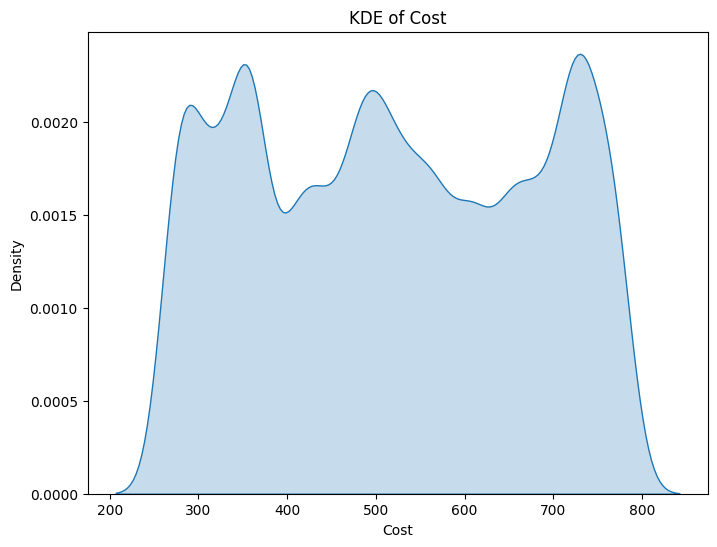

In [44]:
plt.figure(figsize=(8, 6))
sns.kdeplot(train_data['Cost'], shade=True)
plt.title('KDE of Cost')
plt.xlabel('Cost')
plt.ylabel('Density')
plt.show()

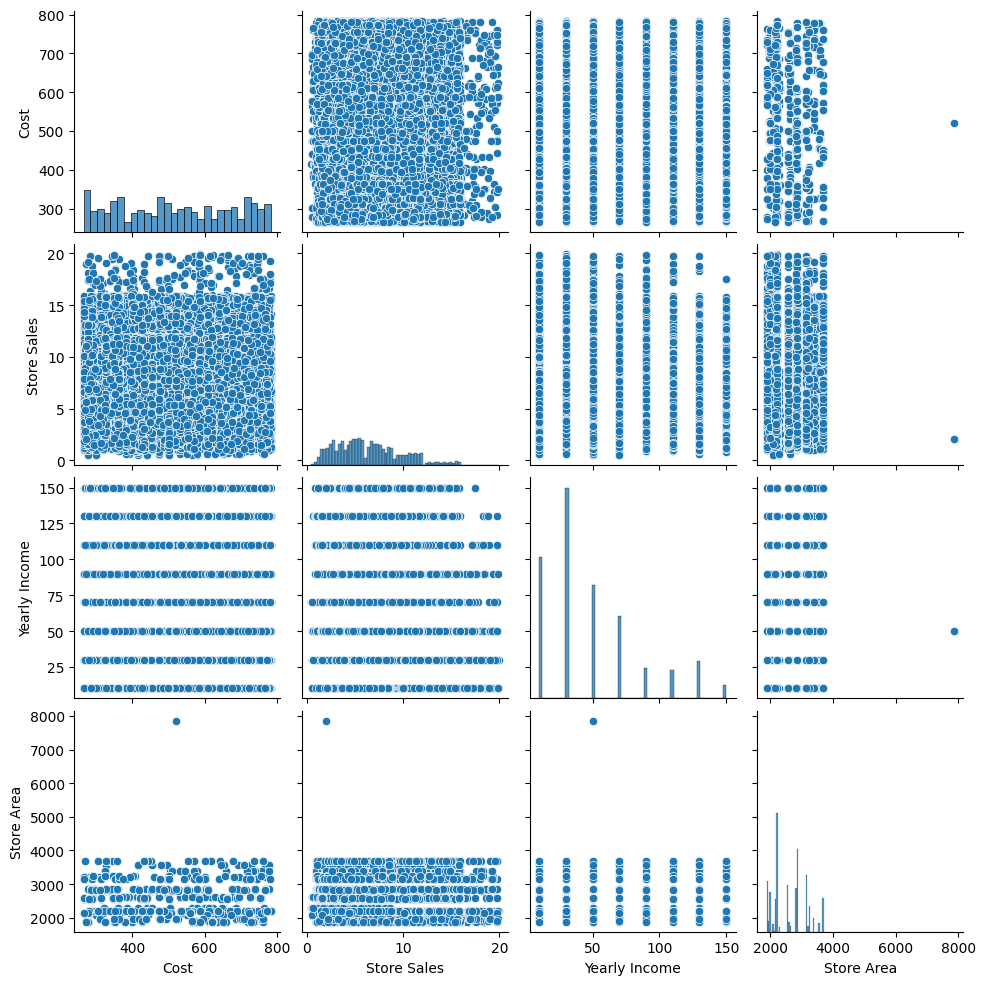

In [45]:

sns.pairplot(train_data, vars=['Cost', 'Store Sales', 'Yearly Income', 'Store Area'])


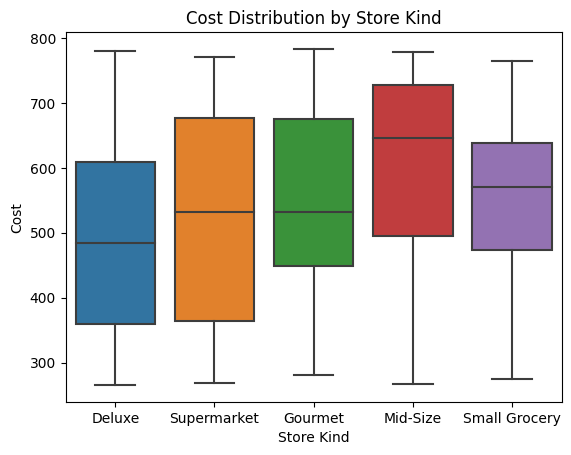

In [46]:
sns.boxplot(x='Store Kind', y='Cost', data=train_data)
plt.title('Cost Distribution by Store Kind')
plt.show()

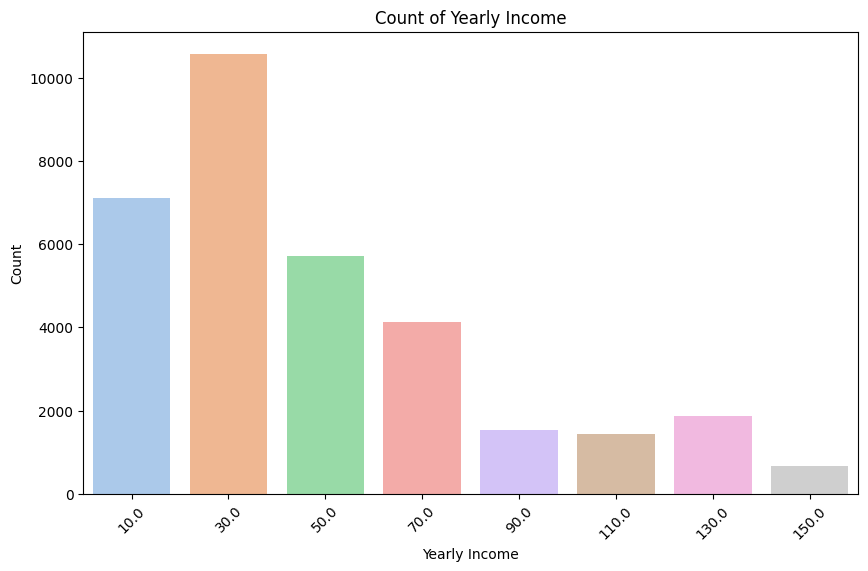

In [47]:
# Count plot for 'Yearly Income'
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='Yearly Income', palette='pastel')
plt.title('Count of Yearly Income')
plt.xlabel('Yearly Income')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

* From the count plot of yearly income, it is evident that the highest yearly income is  $30,000. 

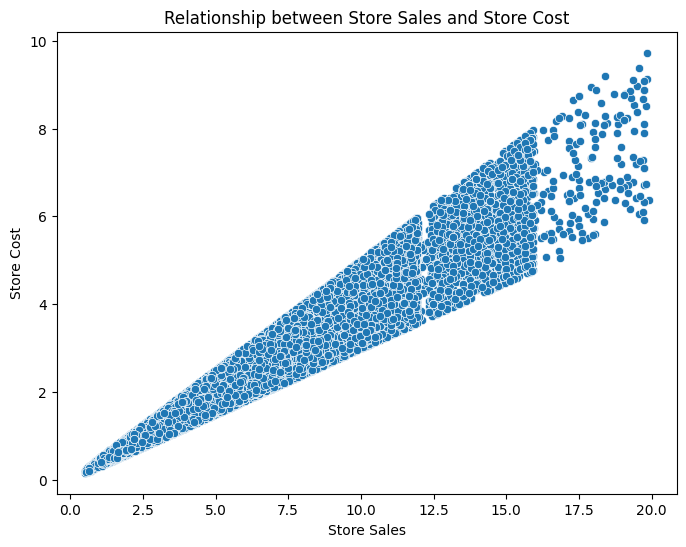

In [48]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=train_data, x='Store Sales', y='Store Cost')
plt.title('Relationship between Store Sales and Store Cost')
plt.xlabel('Store Sales')
plt.ylabel('Store Cost')
plt.show()

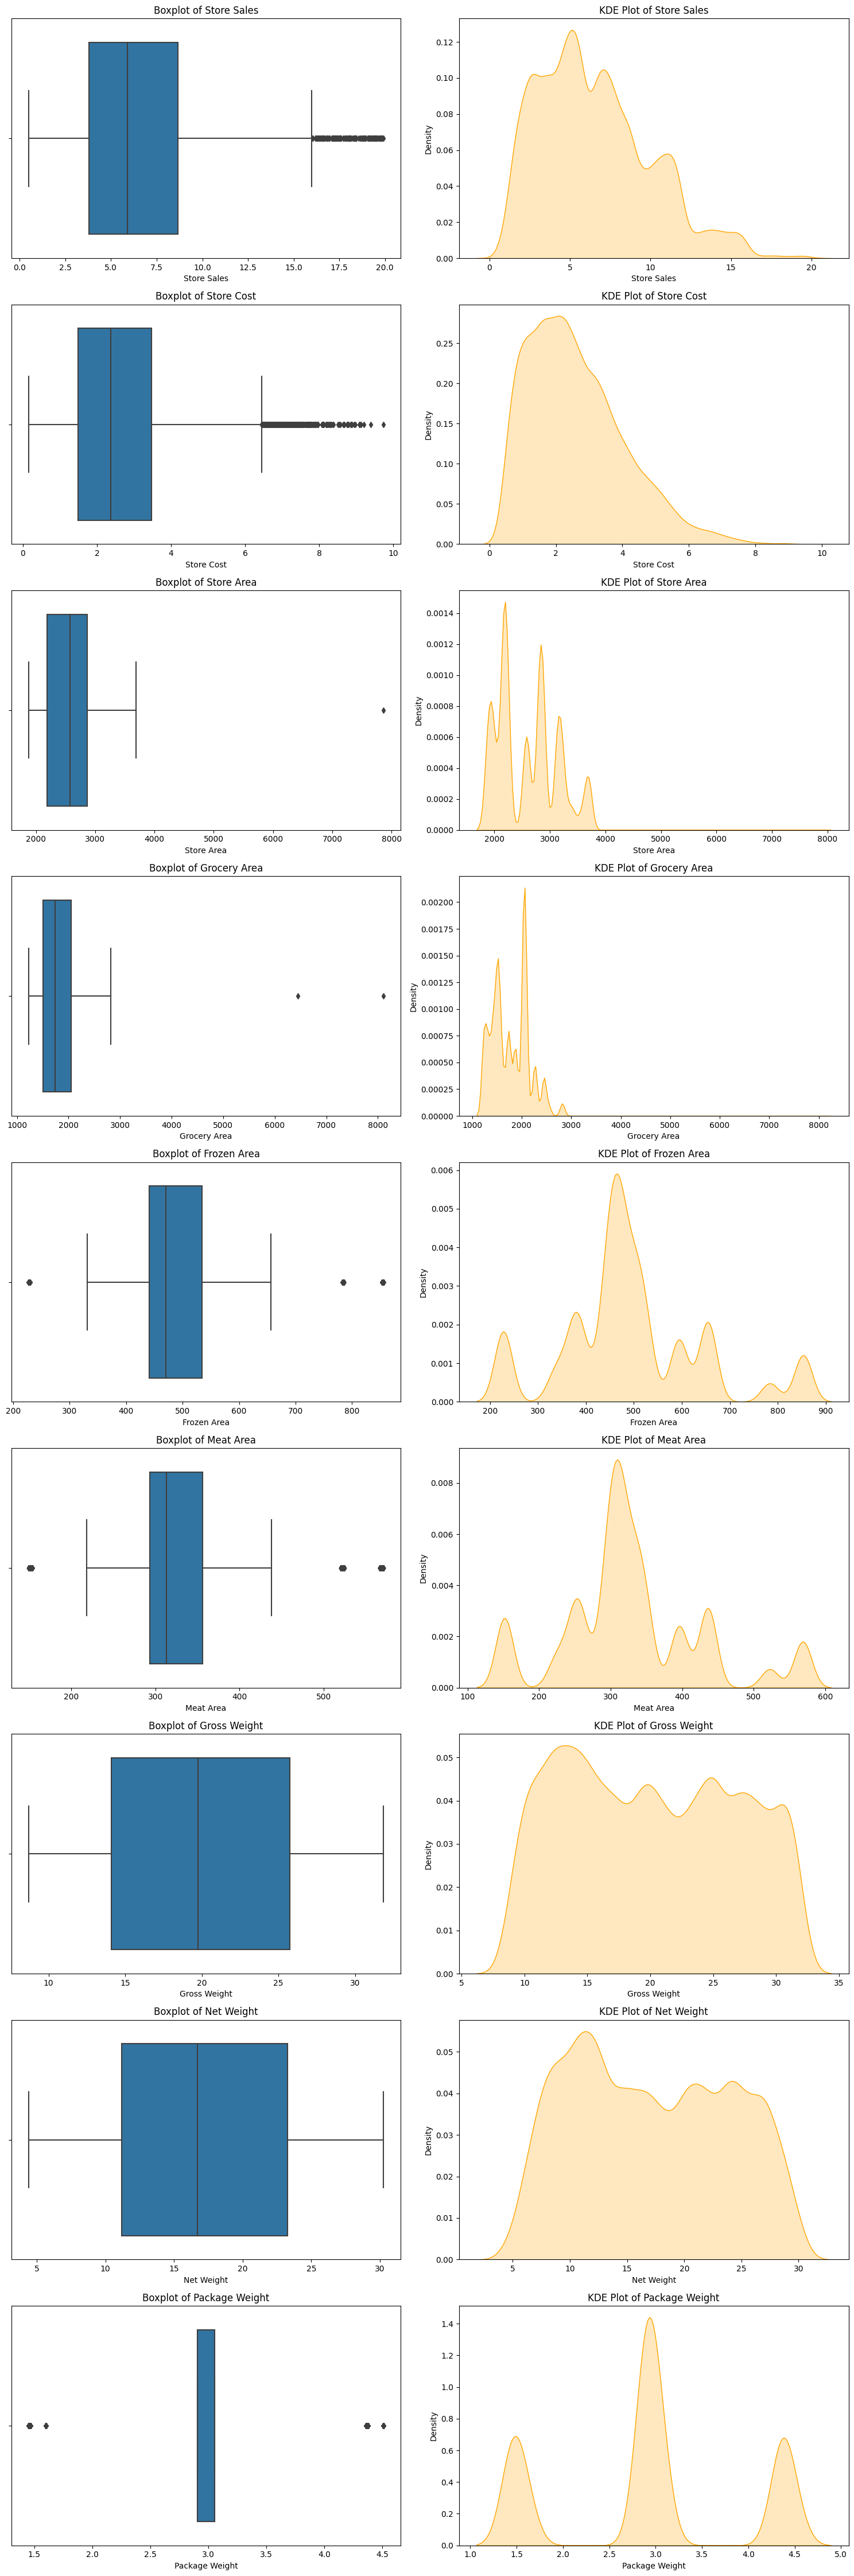

In [49]:
# Filter out continuous columns
continuous_vars = ['Store Sales', 'Store Cost', 'Store Area', 'Grocery Area', 'Frozen Area', 'Meat Area', 'Gross Weight', 'Net Weight', 'Package Weight']

# Define the number of rows and columns for subplots
num_rows = len(continuous_vars)
num_cols = 2  # Two plots for each column (box plot and KDE plot)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Flatten the axes if necessary
if num_rows == 1:
    axes = axes.reshape(1, -1)

# Iterate over each continuous variable and create box plots and KDE plots
for i, column in enumerate(continuous_vars):
    # Box plot
    sns.boxplot(x=train_data[column], ax=axes[i, 0])
    axes[i, 0].set_title(f'Boxplot of {column}')
    axes[i, 0].set_xlabel(column)
 # KDE plot
    sns.kdeplot(data=train_data[column], ax=axes[i, 1], color='orange', fill=True)
    axes[i, 1].set_title(f'KDE Plot of {column}')
    axes[i, 1].set_xlabel(column)

# Adjust layout
plt.tight_layout()

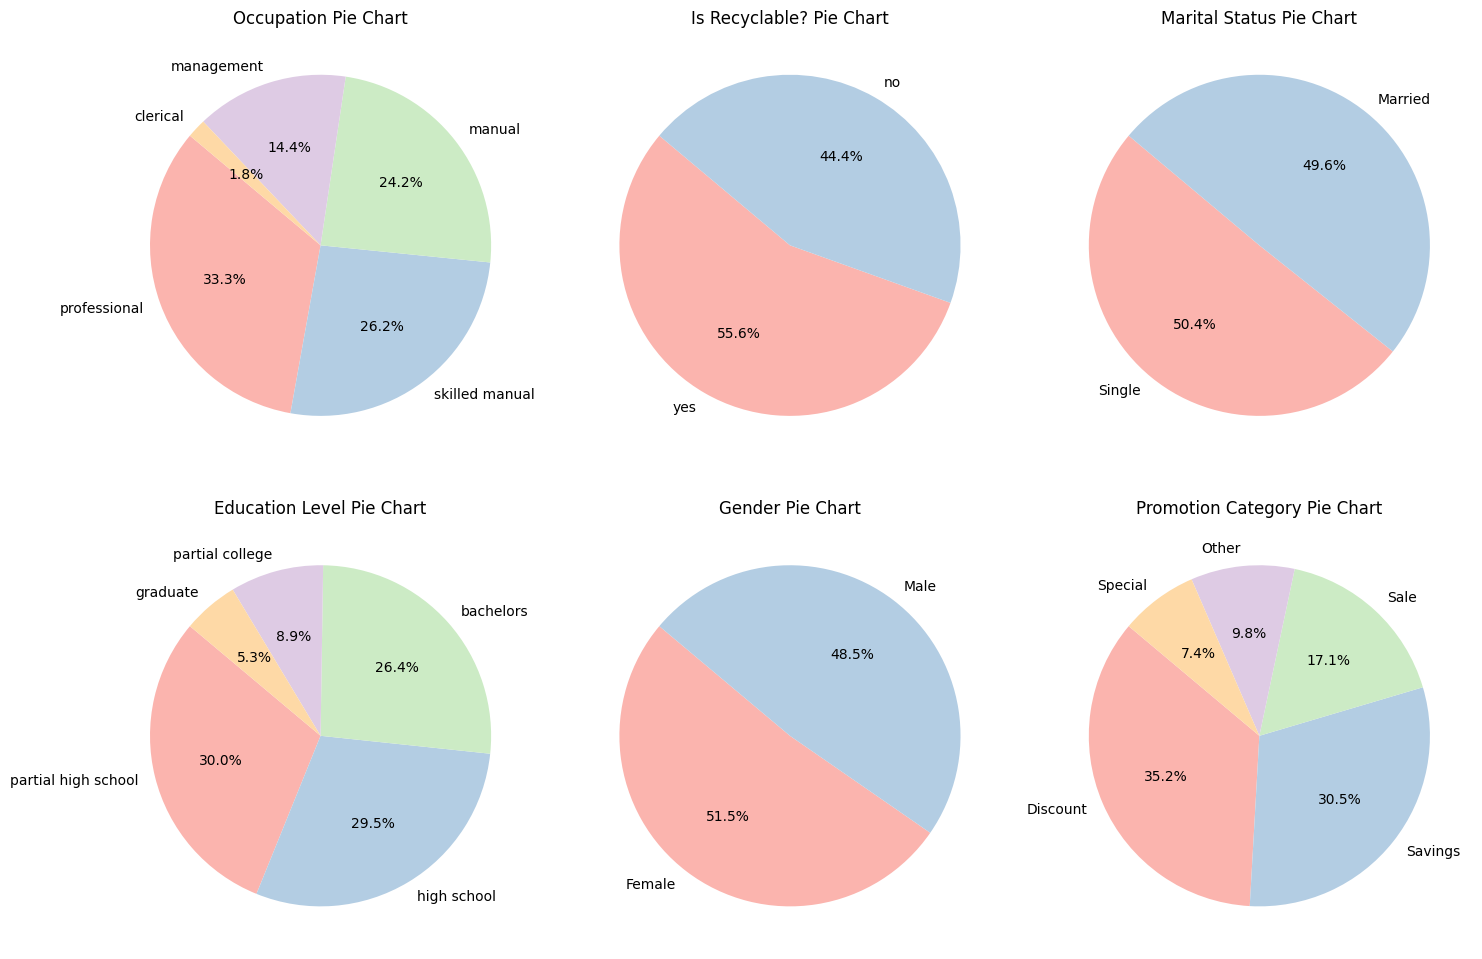

In [50]:
# Columns for pie charts
categorical_vars = ['Occupation', 'Is Recyclable?', 'Marital Status', 'Education Level', 'Gender', 'Promotion Category']

# Reverse mappings to get original labels
reverse_mappings = {col: {v: k for k, v in mapping.items()} for col, mapping in mappings.items()}

# Plot pie charts with original labels
plt.figure(figsize=(15, 10))
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(2, 3, i)
    counts = train_data[var].map(reverse_mappings[var]).value_counts()
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Pastel1'))
    plt.title(f'{var} Pie Chart')
plt.tight_layout()
plt.show()

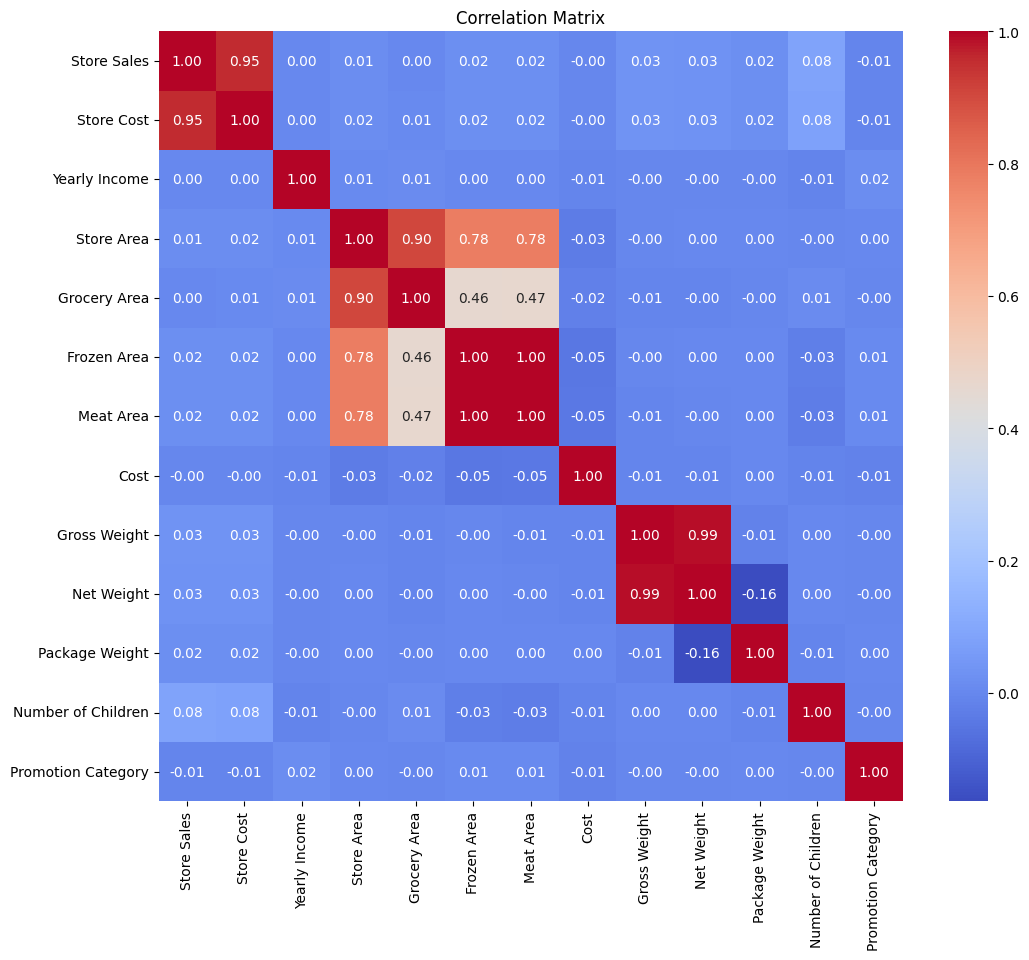

In [51]:
numeric_data = train_data.select_dtypes(include='number')
corr = numeric_data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


# preprocessing :

In [52]:
# Define numerical features
numerical_features = ['Number of Children','Yearly Income']

# Define categorical features
categorical_features = ['Marital Status', 'Gender', 'Education Level', 'Occupation','Promotion Name', 'Place Code']


In [53]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


# Define preprocessing pipeline for numerical features
numerical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Define preprocessing pipeline for categorical features
categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing pipelines for numerical and categorical features
preprocessor = ColumnTransformer([
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])


# Modeling :

In [54]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingRegressor, GradientBoostingRegressor, RandomForestRegressor, ExtraTreesRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from math import sqrt

In [55]:
train_data = train_data[['Promotion Name', 'Place Code', 'Yearly Income', 'Marital Status', 'Gender', 'Education Level', 'Occupation','Cost','Number of Children']]
test=test[['Promotion Name', 'Place Code', 'Yearly Income', 'Marital Status', 'Gender', 'Education Level', 'Occupation','Number of Children']]

In [56]:
# Split the data into features (X) and target variable (y)
X = train_data.drop(["Cost"], axis=1)
y = train_data["Cost"]


In [57]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [58]:
# Preprocess the training data
X_train_preprocessed = preprocessor.fit_transform(X_train)


In [59]:

# Define individual models
model1 = GradientBoostingRegressor(n_estimators=100, random_state=42)
model2 = RandomForestRegressor(n_estimators=100, random_state=42)
model3 = ExtraTreesRegressor(random_state=42, n_estimators=140) 


In [60]:

# Define the voting regressor
voting_regressor = VotingRegressor([('gb', model1), ('rf', model2), ('et', model3)])  


In [61]:
# Create a pipeline with preprocessing and ensemble classifier
full_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('ensemble', voting_regressor)
])

In [62]:
# Train the model
full_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Number of Children',
                                                   'Yearly Income']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Marital Status', 'Gender',
                                                   'Education Level',
                                                   'Occupation',
                                                   'Promotion Name',
                                                   'Place Code'])])),
                ('ensemble',
                 VotingRegressor(estimators=[('gb',
                                              GradientBoostingRegressor(random_state=42)),
                                             ('rf',
                                              RandomForestRegressor(random_state=42)),
                                             ('et',
                                              ExtraTreesRegressor(n_estimators=140,
                                                                  random_state=42))]))])

In [63]:
# Preprocess x_test
X_test_preprocessed = preprocessor.transform(X_test)

In [64]:
# Make predictions
y_pred = full_pipeline.predict(X_test)


In [65]:

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

RMSE: 50.60138699537984


In [66]:
# Preprocess the test data 
test_data_preprocessed = preprocessor.transform(test)


In [67]:
# Make predictions on the preprocessed test data
final_predictions = voting_regressor.predict(test_data_preprocessed)

In [68]:
test_data=pd.read_csv('/kaggle/input/ieee-victories2/test.csv')

In [69]:

IDs = test_data['Unnamed: 0']

predictions_df = pd.DataFrame({'ID': IDs, 'Cost': final_predictions})

predictions_df.to_csv('predictions.csv', index=False)


In [70]:
predictions_df.head()

,ID,Cost
0,0,691.218037
1,1,541.382275
2,2,669.271062
3,3,452.561553
4,4,728.851232
